The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the data
car_data=pd.read_csv('/content/car_age_price.csv')
car_data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


Understanding about the data

In [3]:
car_data.shape

(112, 2)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
car_data.isna().sum()

Year     0
Price    0
dtype: int64

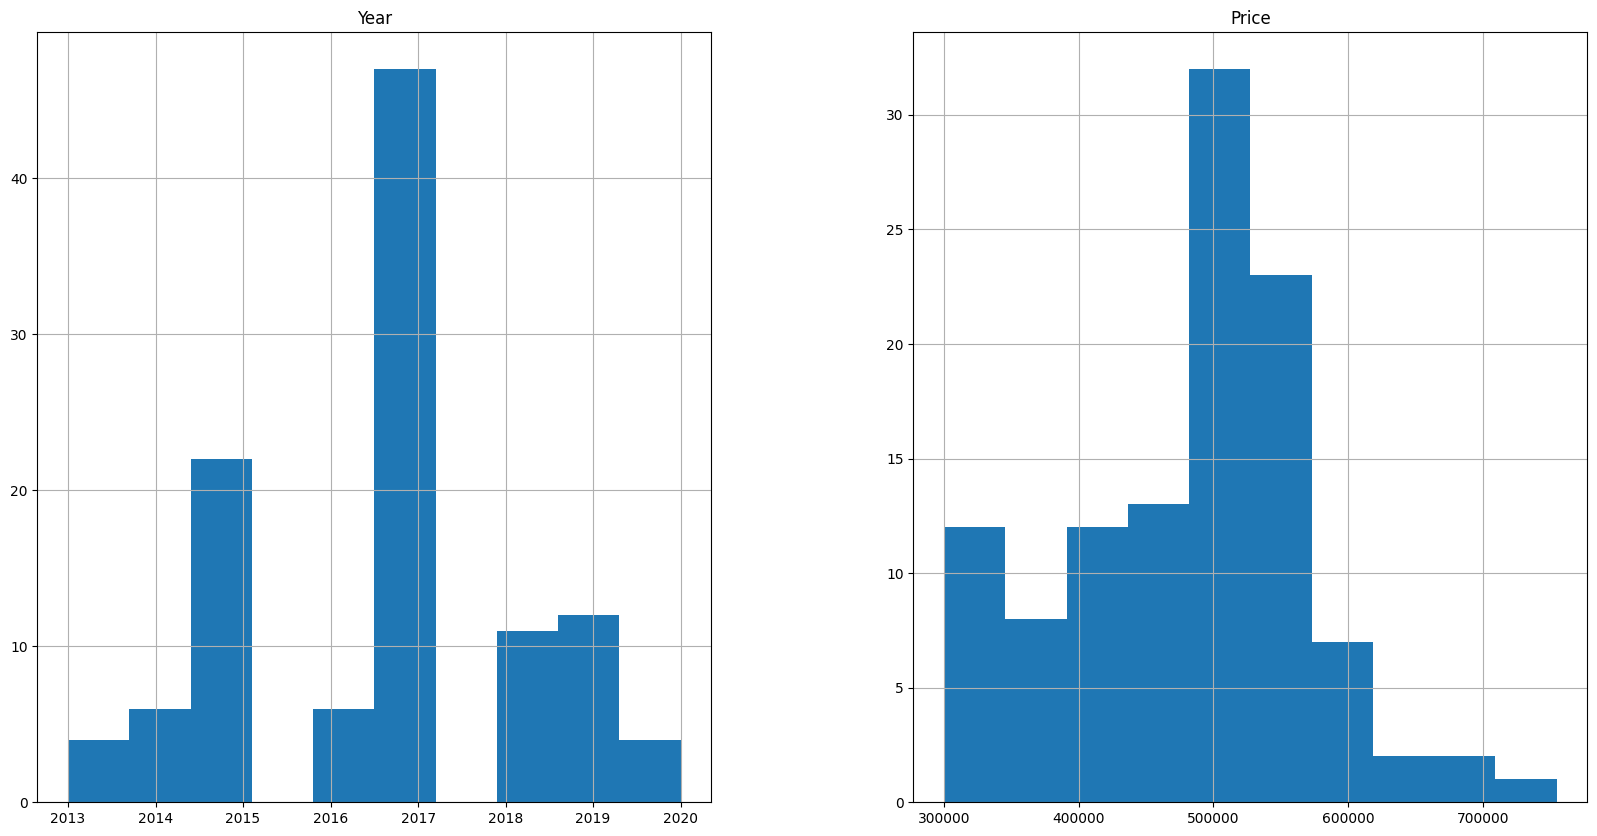

In [6]:
freqgraph = car_data.select_dtypes(include='int64')
freqgraph.hist(figsize=(20,10));

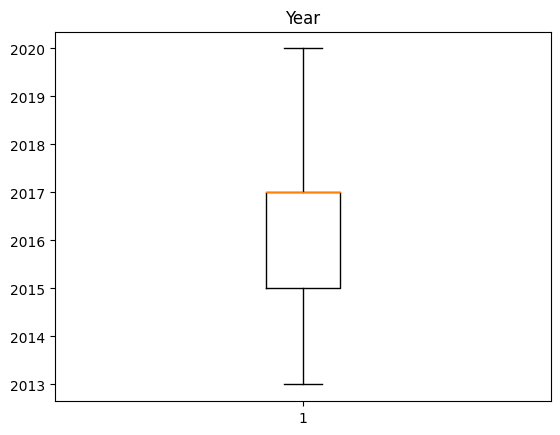

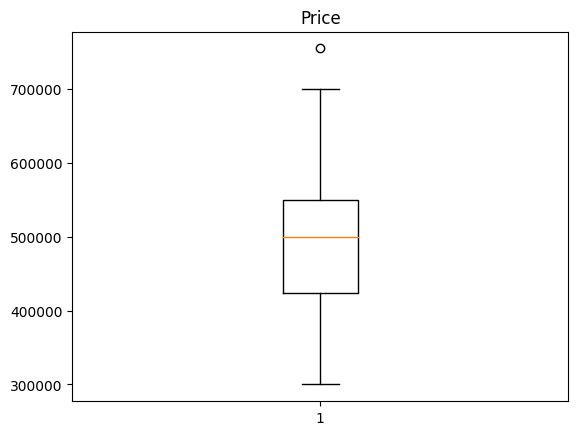

In [7]:
#Finding Outliers
num_columns =['Year', 'Price']


for i in num_columns:
  plt.figure()
  plt.boxplot(car_data[i])
  plt.title(i);

In [8]:
# Handling outlier using IQR method
Q1 = car_data['Price'].quantile(0.25)
Q3 = car_data['Price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper limit for outliers
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

# Clip outliers to the lower and upper limit
car_data['Price'] = car_data['Price'].clip(lower=lower_lim, upper=upper_lim)



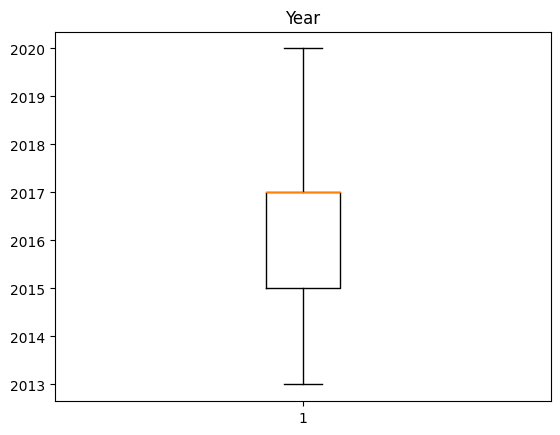

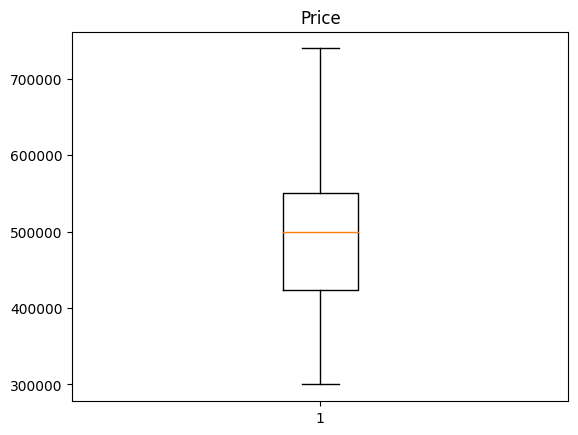

In [9]:
num_columns =['Year', 'Price']


for i in num_columns:
  plt.figure()
  plt.boxplot(car_data[i])
  plt.title(i);

In [10]:
car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483726.535714
std,1.629616,90810.078466
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,739375.000000


Correlation

In [11]:
car_data.corr()

,Year,Price
Year,1.000000,0.777568
Price,0.777568,1.000000


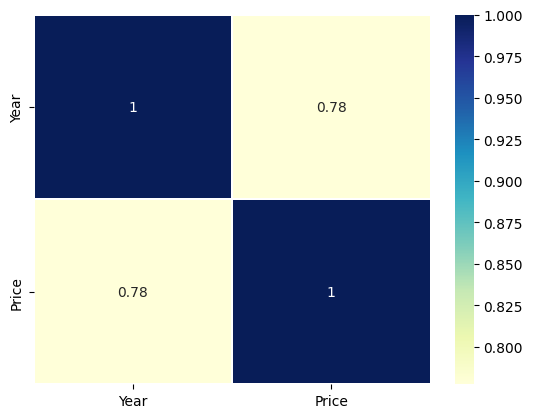

In [12]:
sns.heatmap(car_data.corr(),annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

In [13]:
#Splitting dependent and independent features
y=car_data['Price']
x=car_data.drop(['Price'],axis=1)

In [14]:
#splitting to train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [15]:
#fitting train sets into linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
lin_model=lr.fit(x_train,y_train)

#doing prediction on test set
lin_pred=lin_model.predict(x_test)

#to check model goodness

from sklearn.metrics import r2_score
Linear_r2=r2_score(y_test, lin_pred)
print("R2 Score of Linear model:",Linear_r2)


R2 Score of Linear model: 0.4380956804935515


In [16]:
#fitting train sets into Lasso model
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=0.1) # You can adjust the alpha value
lasso_model=lasso.fit(x_train, y_train)

#doing prediction on test set
lasso_pred=lasso_model.predict(x_test)

#to check model goodness

from sklearn.metrics import r2_score
Lasso_r2=r2_score(y_test, lasso_pred)
print("R2 Score of Lasso model:",Lasso_r2)


R2 Score of Lasso model: 0.4380961288377724


In [17]:
# Predicting the price of 2022 model
year_2022=[[2022]]

# predictions using Linear regression model
predicted_price_linear =lin_model.predict(year_2022)

# predictions using Lasso regression model

predicted_price_lasso=lasso_model.predict(year_2022)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [18]:
print("Predicted Price of a 2022 Model (Linear Regression):", predicted_price_linear[0])
print("Predicted Price of a 2022 Model (Lasso Regression):", predicted_price_lasso[0])


Predicted Price of a 2022 Model (Linear Regression): 739002.0571428686
Predicted Price of a 2022 Model (Lasso Regression): 739001.8409052342


In [19]:
# Comparision of Linear and Lasso model
if Linear_r2 > Lasso_r2:
  print("Linear Model is good")
else:
  print("Lasso Model is good")

Lasso Model is good


**When compare both r2 Score of Lasso and Linear model,Lasso model is closer to 1 so we conclude that Lasso model is best.**